In [8]:
from celcomen.models.celcomen import celcomen
from celcomen.models.simcomen import simcomen
from celcomen.training_plan.train import train
from celcomen.datareaders.datareader import get_dataset_loaders


In [9]:
!pwd

/nfs/team205/sm58/packages/celcomen_trials/celcomen_final


In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
h5ad_path="data/visium-OCT_SAN_raw.h5ad"

loader = get_dataset_loaders("data/visium-OCT_SAN_raw.h5ad", "sangerID", 6, True, )

Step 1
=====
Number of graphs in the current batch: 1
DataBatch(x=[3802, 20715], edge_index=[2, 22812], y=[1], pos=[3802, 2], batch=[3802], ptr=[2])

Step 2
=====
Number of graphs in the current batch: 1
DataBatch(x=[2881, 20715], edge_index=[2, 17286], y=[1], pos=[2881, 2], batch=[2881], ptr=[2])

Step 3
=====
Number of graphs in the current batch: 1
DataBatch(x=[3052, 20715], edge_index=[2, 18312], y=[1], pos=[3052, 2], batch=[3052], ptr=[2])

Step 4
=====
Number of graphs in the current batch: 1
DataBatch(x=[3448, 20715], edge_index=[2, 20688], y=[1], pos=[3448, 2], batch=[3448], ptr=[2])

Step 5
=====
Number of graphs in the current batch: 1
DataBatch(x=[4243, 20715], edge_index=[2, 25458], y=[1], pos=[4243, 2], batch=[4243], ptr=[2])

Step 6
=====
Number of graphs in the current batch: 1
DataBatch(x=[3430, 20715], edge_index=[2, 20580], y=[1], pos=[3430, 2], batch=[3430], ptr=[2])

Step 7
=====
Number of graphs in the current batch: 1
DataBatch(x=[2852, 20715], edge_index=[2, 1711

In [13]:
import torch
torch.cuda.is_available()

True

In [14]:
n_genes= 20715 #33
n_neighbors=6
seed=1
zmft_scalar = 0.01
epochs = 100
learning_rate = 5e-3


model = celcomen(input_dim=n_genes, output_dim=n_genes, n_neighbors=n_neighbors, seed=seed)
model.to("cuda")
losses = train(epochs, learning_rate, model, loader, zmft_scalar=zmft_scalar, seed=1, device="cuda")

Epoch=0   |   Loss=3045.880859375
Epoch=1   |   Loss=3075.81787109375
Epoch=2   |   Loss=3007.5185546875
Epoch=3   |   Loss=2950.381103515625
Epoch=4   |   Loss=2902.04638671875
Epoch=5   |   Loss=2860.72802734375
Epoch=6   |   Loss=2825.123291015625
Epoch=7   |   Loss=2794.169921875
Epoch=8   |   Loss=2767.037841796875
Epoch=9   |   Loss=2743.08349609375
Epoch=10   |   Loss=2721.79833984375
Epoch=11   |   Loss=2702.72412109375
Epoch=12   |   Loss=2685.56201171875
Epoch=13   |   Loss=2670.029541015625
Epoch=14   |   Loss=2655.916015625
Epoch=15   |   Loss=2643.045654296875
Epoch=16   |   Loss=2631.25537109375
Epoch=17   |   Loss=2620.425537109375
Epoch=18   |   Loss=2610.43603515625
Epoch=19   |   Loss=2601.190185546875
Epoch=20   |   Loss=2592.60693359375
Epoch=21   |   Loss=2584.6181640625
Epoch=22   |   Loss=2577.16064453125
Epoch=23   |   Loss=2570.1806640625
Epoch=24   |   Loss=2563.629638671875
Epoch=25   |   Loss=2557.469482421875
Epoch=26   |   Loss=2551.662109375
Epoch=27   | 

[Text(0.5, 0, 'epochs'), Text(0, 0.5, 'loss')]

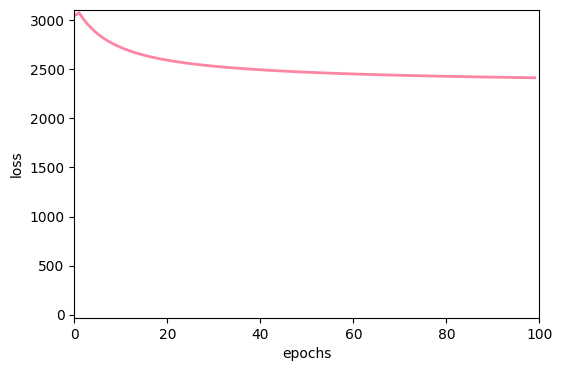

In [15]:
# create the plot
fig, ax = plt.subplots(figsize=[6, 4])
ax.grid(False)
ax.plot(losses, lw=2, color='#fe86a4')
ax.set_xlim(0, epochs)
vmin, vmax = min(min(losses), 0), max(losses)
vstep = (vmax - vmin) * 0.01
ax.set_ylim(vmin-vstep, vmax+vstep)
ax.set(xlabel='epochs', ylabel='loss')

In [16]:
# '\''+'\',\''.join(pd.DataFrame(avis_sub.uns['rank_genes_groups']['names']).iloc[:25, 0].tolist())+'\''

In [17]:
# # propose an X introducing ISG15 inflammation
# proposed_x = avis_sub.X.toarray().copy()
# # adjust the X so we artificially introduce signaling to the center left side of the tissue
# np.random.seed(0)
# df_gex = sc.get.obs_df(avis_sub, keys=['IFITM3'])['IFITM3']
# mask = avis_sub.obs.index == np.random.choice(avis_sub.obs.index[df_gex > 0], size=1)[0]
# idx = np.where(avis_sub.var_names == 'IFITM3')[0][0]
# proposed_x[mask, idx] = 0
# avis_sub.obs['perturbed'] = 'unperturbed'
# avis_sub.obs['perturbed'].iloc[np.where(squareform(pdist(avis_sub.obsm['spatial']))[mask, :] < 30)[1]] = 'perturbed-neighbors1'
# avis_sub.obs['perturbed'].iloc[np.where(squareform(pdist(avis_sub.obsm['spatial']))[mask, :] < 15)[1]] = 'perturbed-neighbors0'
# avis_sub.obs.loc[mask, 'perturbed'] = 'perturbed'
# avis_sub.uns['perturbed_colors'] = ['#ff47a6','#f593c2','#f7cbe0','#f7ebf1']
# sc.pl.embedding(avis_sub, basis='spatial', color=['perturbed'], use_raw=False, s=1e2)